# Food analysis

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("data_19_04.csv")
df.head(10)

'#1.Step: Create a new colum with ratio in hecto'
df["ratio_raw"] = df["Calorie"]/df["Steps."]*100

'#2.Step: Calculate the weight diff'
df["diff"] = df ["Weight"].diff()
'#2.2.Step: Shift the weight diff one day back'
df["diff_one_day"] = df ["Weight"].diff().shift(-1)
df.head(10)
'#3.Step: Calculate a col which shows if lost weight'
df["lost_weight"]=None
df["lost_weight"].loc[df["diff_one_day"]>0]=True
df["lost_weight"].loc[df["lost_weight"]!=True]=False
df.head(-1)




/home/wlg1fe/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Date,Weight,Steps.,Calorie,ratio_raw,diff,diff_one_day,lost_weight
0,19/04/2020,84.7,25000,1147,4.588000,NaN,0.2,True
1,18/04/2020,84.9,14238,1529,10.738868,0.2,0.0,False
2,17/04/2020,84.9,34500,2054,5.953623,0.0,0.0,False
3,16/04/2020,84.9,30000,1299,4.330000,0.0,0.3,True
4,15/04/2020,85.2,30500,1453,4.763934,0.3,0.9,True
5,14/04/2020,86.1,32200,1602,4.975155,0.9,0.6,True
6,13/04/2020,86.7,29000,1711,5.900000,0.6,0.0,False
7,12/04/2020,86.7,28000,1850,6.607143,0.0,-0.2,False
8,11/04/2020,86.5,26585,2144,8.064698,-0.2,0.2,True
9,10/04/2020,86.7,14500,2726,18.800000,0.2,0.4,True


In [12]:
# Importing matplotlib
import matplotlib.pyplot as plt

# Function to help us plot
def plot_points(dataframe,in_x1,in_x2,de_y):
    X = np.array(dataframe[[in_x1,in_x2]])
    y = np.array(dataframe[de_y])
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
    plt.xlabel(in_x1)
    plt.ylabel(in_x2)
    
# Plotting the points

plot_points(df,"Steps.","Calorie","lost_weight")

plt.show()


from sklearn import preprocessing 
cm = plt.cm.get_cmap('tab20c')


df_nan = df.loc[df["diff"].notnull()]
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
df_nan["diff_norm"]=min_max_scaler.fit_transform(df_nan[["diff"]])*100
df_nan.head(10)

/home/wlg1fe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Date,Weight,Steps.,Calorie,ratio_raw,diff,diff_one_day,lost_weight,diff_norm
1,18/04/2020,84.9,14238,1529,10.738868,0.2,0.0,False,35.714286
2,17/04/2020,84.9,34500,2054,5.953623,0.0,0.0,False,28.571429
3,16/04/2020,84.9,30000,1299,4.330000,0.0,0.3,True,28.571429
4,15/04/2020,85.2,30500,1453,4.763934,0.3,0.9,True,39.285714
5,14/04/2020,86.1,32200,1602,4.975155,0.9,0.6,True,60.714286
6,13/04/2020,86.7,29000,1711,5.900000,0.6,0.0,False,50.000000
7,12/04/2020,86.7,28000,1850,6.607143,0.0,-0.2,False,28.571429
8,11/04/2020,86.5,26585,2144,8.064698,-0.2,0.2,True,21.428571
9,10/04/2020,86.7,14500,2726,18.800000,0.2,0.4,True,35.714286
10,09/04/2020,87.1,27439,1320,4.810671,0.4,0.6,True,42.857143


In [13]:
df_pro.sort_values("ratio_raw")

,Date,Weight,Steps.,Calorie,ratio_raw,diff,diff_one_day,lost_weight,color_k
15,04/04/2020,87.9,11400,470,4.122807,-0.4,0.0,False,red
3,16/04/2020,84.9,30000,1299,4.330000,0.0,0.0,False,#03fce9
0,19/04/2020,84.7,25000,1147,4.588000,NaN,NaN,False,green
4,15/04/2020,85.2,30500,1453,4.763934,0.3,0.0,False,blue
10,09/04/2020,87.1,27439,1320,4.810671,0.4,0.2,True,blue
5,14/04/2020,86.1,32200,1602,4.975155,0.9,0.3,True,blue
12,07/04/2020,87.9,26370,1358,5.149791,0.2,0.6,True,blue
11,08/04/2020,87.7,29787,1609,5.401685,0.6,0.4,True,blue
20,30/03/2020,89.7,14854,850,5.722364,2.0,0.6,True,blue
6,13/04/2020,86.7,29000,1711,5.900000,0.6,0.9,True,blue


/home/wlg1fe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/wlg1fe/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/home/wlg1fe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

<IPython.core.display.Javascript object>


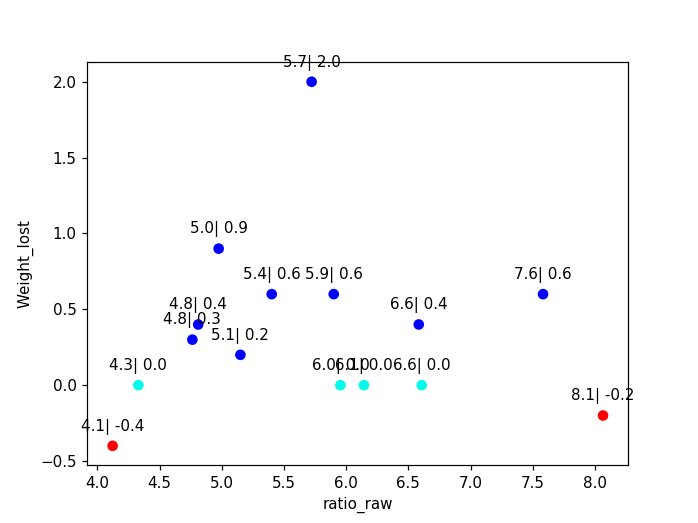

In [14]:
%matplotlib notebook


'#.Step: Pre-process data, remove the extrem points'
df_pro = df.loc[df["ratio_raw"]<10]



df_pro["color_k"]=None
df_pro["color_k"].loc[df_pro["diff"].isnull()] ="green"
df_pro["color_k"].loc[df_pro["diff"]<0] ="red"
df_pro["color_k"].loc[df_pro["diff"]==0] ="#03fce9"
df_pro["color_k"].loc[(df_pro["diff"]>0) & (df_pro["diff"]<=0.2)] ="green"
df_pro["color_k"].loc[df_pro["diff"]>0.2] ="blue"

plt.scatter(df_pro["ratio_raw"],df_pro["diff"],c=df_pro["color_k"])
plt.xlabel("ratio_raw")
plt.ylabel("Weight_lost")

for x,y in zip(df_pro["ratio_raw"],df_pro["diff"]):

    label = "{:.1f}| {:.1f}".format(x,y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right o
plt.show()

<IPython.core.display.Javascript object>


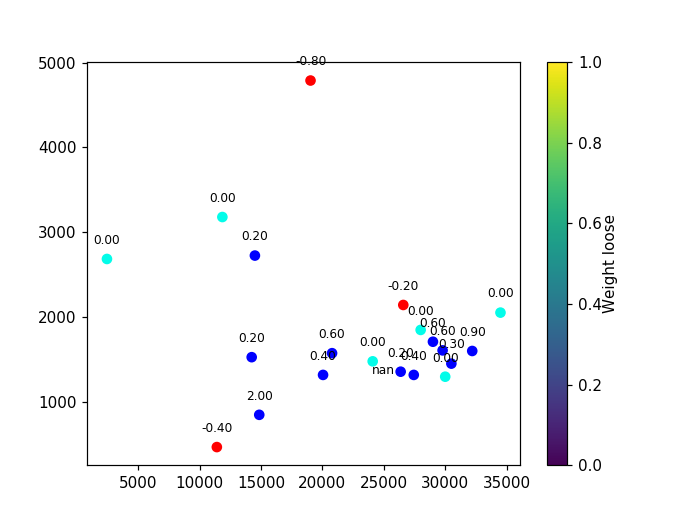

In [17]:
from sklearn import preprocessing 
import matplotlib




df["color"]=None
df["color"].loc[df["diff"].isnull()] ="white"
df["color"].loc[df["diff"]<0] ="red"
df["color"].loc[df["diff"]==0] ="#03fce9"
df["color"].loc[(df["diff"]>0) & (df["diff"]<=0.2)] ="green"
df["color"].loc[df["diff"]>0.2] ="blue"
# # Create an object to transform the data to fit minmax processor
# df_nan = df.loc[df["diff"].notnull()]
# min_max_scaler = preprocessing.MinMaxScaler()
# df_nan["diff_norm"]=min_max_scaler.fit_transform(df_nan[["diff"]])*100
# #================

df_nan.head()

# plt.scatter(df["Steps."],df["Calorie"],c=df["diff"],
#             cmap=matplotlib.colors.ListedColormap(["blue","#03fce9","green","#fc6c03","red"])
#            )
# plt.show()

plt.scatter(df["Steps."],df["Calorie"],c=df["color"],
            cmap=df["color"]
           )
           
plt.show()
cbar= plt.colorbar()
cbar.set_label("Weight loose", labelpad=+1)

for x,y,z in zip(df["Steps."],df["Calorie"],df["diff"]):

    label = "{:.2f}".format(z)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 size=8,
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right o
#Add line to plot    
# plot([x1, x2], [y1, y2], color='k', linestyle='-', linewidth=2)  
#======
plt.show()

## WeightWar

In [93]:
import os 
import pandas as pd 
import sqlite3
'#1.Step: Read the table'
db_conn =sqlite3.connect('weight_15_09_18__18_04_20.db')

table = pd.read_sql_query("SELECT * FROM weightdatum",db_conn)
'#2.Step:Show table'
table.head(10)

,_id,w_date,w_weight,w_fat,w_exer,w_drunk,w_val_a,w_val_b,w_val_c,w_check_a,w_check_b,w_check_c,w_memo
0,1,2018-09-12,8310,0,false,false,0,0,0,false,false,false,
1,2,2018-09-13,8240,0,false,false,0,0,0,false,false,false,
2,3,2018-09-14,8270,0,false,false,0,0,0,false,false,false,
3,4,2018-09-17,8300,0,false,false,0,0,0,false,false,false,
4,5,2018-09-16,8400,0,false,false,0,0,0,false,false,false,
5,6,2018-09-15,0,0,false,false,0,0,0,false,false,false,
6,7,2018-09-18,8250,0,true,false,0,0,0,false,false,false,- 1 Stuck Apfelkuchen
7,8,2018-09-19,8240,0,false,false,0,0,0,false,false,false,
8,9,2018-09-20,8400,0,false,false,0,0,0,false,false,false,
9,10,2018-09-21,8170,0,false,false,0,0,0,false,false,false,


In [102]:
'#3.Step: Analyse the interessting column the w_eight w_date'
from IPython.display import display
df = table[["w_weight","w_date"]]


'#3.1.Step: Preprocessing: Change the type of the column'
df.loc[:,"w_weight_int"]= df["w_weight"].astype('int32')/100
df.loc[:,"w_date_date"] = pd.to_datetime(df["w_date"])


'#3.2.Step: Drop 0 values'
df_none_zero = df.loc[df["w_weight_int"]!=0]

df_finish = df_none_zero[["w_weight_int","w_date_date"]]


display(df_finish.describe())

print("Overal stats")

/home/wlg1fe/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/wlg1fe/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,w_weight_int
count,325.000000
mean,87.764677
std,1.888416
min,81.700000
25%,86.500000
50%,88.200000
75%,89.100000
max,91.220000


Overal stats


In [140]:
for year,i in zip([2018,2019,2020],[1,2,3]) :
    print(i)
    print(year)

1
2018
2
2019
3
2020


<IPython.core.display.Javascript object>


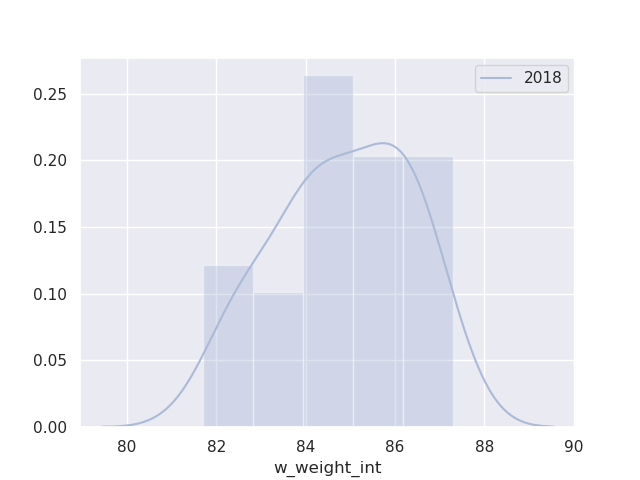

Year: 2018


,w_weight_int
count,44.000000
mean,84.845455
std,1.504328
min,81.700000
25%,83.950000
50%,84.950000
75%,86.100000
max,87.300000


<IPython.core.display.Javascript object>


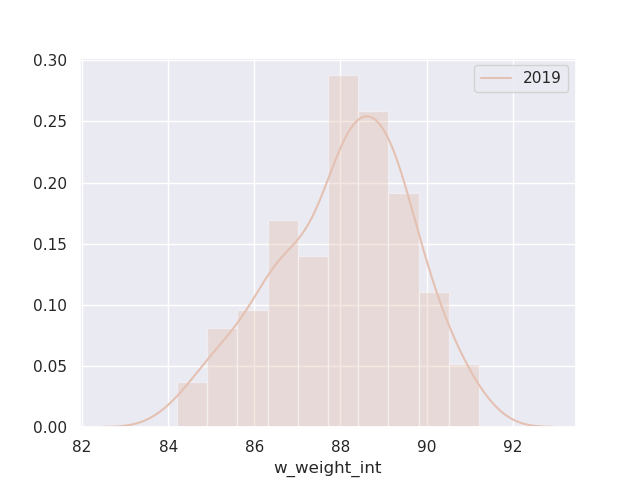

Year: 2019


,w_weight_int
count,193.000000
mean,88.062280
std,1.558277
min,84.200000
25%,87.000000
50%,88.300000
75%,89.100000
max,91.220000


<IPython.core.display.Javascript object>

Year: 2020


,w_weight_int
count,88.000000
mean,88.571591
std,1.279992
min,84.900000
25%,88.000000
50%,88.700000
75%,89.400000
max,91.200000


In [144]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set(color_codes=True)
'#Show the stats for each year'

for year,i in zip([2018,2019,2020],[1,2,3]) :
    plt.figure(year)
    hist_color=["dummy","#aabad7","#e4c1b2","#aecfba"]
    print(f"Year: {year}")
    df_year = df_finish.loc[df_finish["w_date_date"].dt.year==year]
    display(df_year.describe())
    sns.distplot(df_year.w_weight_int,kde_kws={ "label": year,"color":hist_color[i]},  hist_kws={"color":hist_color[i]});
    plt.show()
    print("=="*15)
    
    


In [145]:
for year,i in zip([2018,2019,2020],[1,2,3]) :

    print(f"Year: {year}")
    plt.figure(5)
    hist_color=["dummy","#aabad7","#e4c1b2","#aecfba"]
    df_year = df_finish.loc[df_finish["w_date_date"].dt.year==year]
    sns.distplot(df_year.w_weight_int,kde_kws={ "label": year}, hist_kws={"color":hist_color[i]});
    plt.show()
    print("=="*15)

Year: 2018


<IPython.core.display.Javascript object>

Year: 2019
Year: 2020


<IPython.core.display.Javascript object>


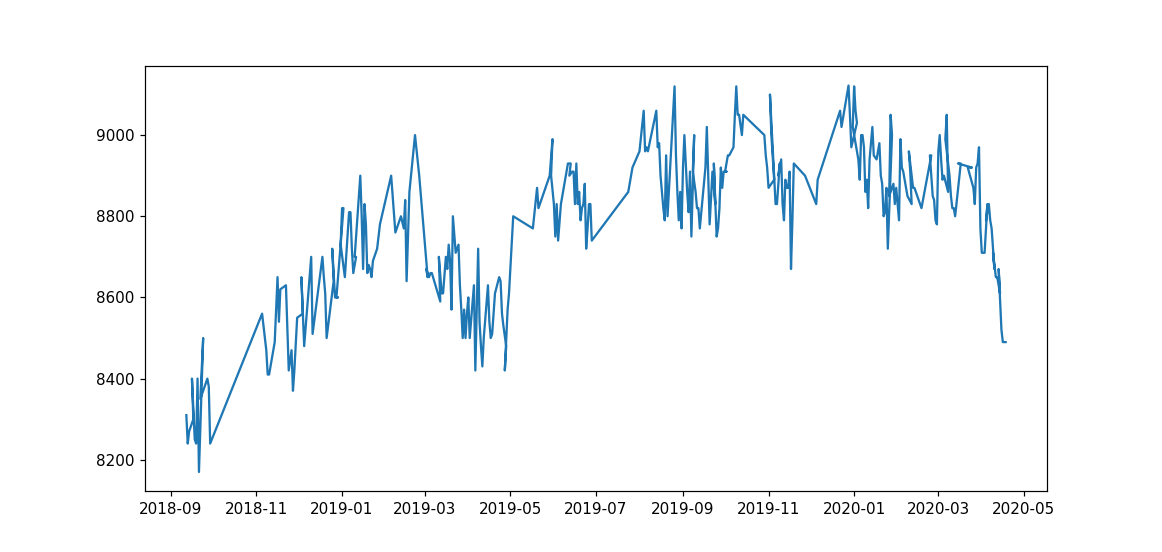

In [100]:
'#.Plot result'
import matplotlib.pyplot as plt

plt.plot(df_finish["w_date_date"],df_finish["w_weight_int"])




# Testing for foodwatch app

In [14]:
weight=85
weight_range=0.5
df = pd.read_csv("data_19_04.csv")
df["Date"] = pd.to_datetime(df["Date"], format='%d/%m/%Y')
df.loc[df["Date"]=="2020-04-15","Weight"]=86.6
df.loc[df["Date"]=="2020-04-10","Weight"]=84.6
df.loc[df["Date"]=="2020-03-30","Weight"]=84.6
df.loc[df["Date"]=="2020-03-31","Weight"]=84.6

df_weight = df.loc[(df["Weight"]>=weight-weight_range) & (df["Weight"]<=weight+weight_range )]
#Sort by day
df_weight_sorted = df_weight.sort_values(by=['Date'],ascending=False)
'#Caclulate the day diff'
df_weight_sorted["day_diff"] = df_weight_sorted["Date"].diff().shift(-1)
df_weight_sorted.groupby(["day_diff"]).count()

'# Now count all typs which are differnt height then 1. That is the times when you failed'

'# Now count all typs which are differnt height then 1. That is the times when you failed'

In [22]:
df

,Date,Weight,Steps.,Calorie
0,2020-04-19,84.7,25000,1147
1,2020-04-18,84.9,14238,1529
2,2020-04-17,84.9,34500,2054
3,2020-04-16,84.9,30000,1299
4,2020-04-15,86.6,30500,1453
5,2020-04-14,86.1,32200,1602
6,2020-04-13,86.7,29000,1711
7,2020-04-12,86.7,28000,1850
8,2020-04-11,86.5,26585,2144
9,2020-04-10,84.6,14500,2726


NameError: name 'existing_sequenc' is not defined

In [7]:
i=7
if (seq[i]+1)==(seq[i+1]):
    current_sequence_length+=1
    print(current_sequence_length)

NameError: name 'seq' is not defined

In [251]:
seq = [ 0,  3,  6,  3,  9, 19, 20,21,22]
existing_sequenc = defaultdict()
current_sequence_length = 0
for i in range(0,len(seq)-1):

    print(i)
    ##Compare if next element is one bigger
    if (seq[i]+1)==(seq[i+1]):
        current_sequence_length+=1
    else:
        current_sequence_length+=1
        existing_sequenc[current_sequence_length]=current_sequence_length
        current_sequence_length=0
        print("Fail")
print(max(existing_sequenc))

0
Fail
1
Fail
2
Fail
3
Fail
4
Fail
5
6
7
1


In [267]:
a = df_weight.index.values
a = [ 0,  1,  2,  3,  9, 19, 20]



def get_longest_seque(seq):
    """
    Get the longest sequence, where each element is increaed by 1 
    
    @args:
      seq(list): e.g.  [ 0,  1,  2,  3,  9, 19, 20]
    return: 
        existing_sequenc(dict): is a dict which contains the length of all sequences
    """
    existing_sequenc = defaultdict()
    current_sequence_length = 0
    for i in range(0,len(seq)-1):

        print(i)
        ##Compare if next element is one bigger
        if (seq[i]+1)==(seq[i+1]):
            current_sequence_length+=1
        else:
            current_sequence_length+=1
            existing_sequenc[current_sequence_length]+=1
            current_sequence_length=0
            print("Fail")
    
        return existing_sequenc

assert(1==get_longest_seque([ 0,  3,  6,  3,  9, 19, 20]))
assert(2==get_longest_seque([ 0,  3,  6,  3,  9, 19, 20,21]))

SyntaxError: can't assign to operator (<ipython-input-267-96261272a1a0>, line 25)

In [163]:
from collections import defaultdict
import sys
def longestSubsequence(a, n): 
    mp = defaultdict(lambda:0) 
  
    # stores the length of the longest  
    # subsequence that ends with a[i]  
    dp = [0 for i in range(n)] 
    maximum = -sys.maxsize 
  
    # iterate for all element  
    for i in range(n): 
  
        # if a[i]-1 is present before i-th index  
        if a[i] - 1 in mp: 
  
            # last index of a[i]-1  
            lastIndex = mp[a[i] - 1] - 1
  
            # relation  
            dp[i] = 1 + dp[lastIndex] 
        else: 
            dp[i] = 1
  
            # stores the index as 1-index as we need to  
            # check for occurrence, hence 0-th index  
            # will not be possible to check  
        mp[a[i]] = i + 1
  
        # stores the longest length  
        maximum = max(maximum, dp[i]) 
    return maximum 
  
  
# Driver Code  
a = [ 0,  1,  2,  5,  6, 19, 20]
n = len(a) 
print(longestSubsequence(a, n)) 
  
# This code is contributed by Shrikant13 

3


In [150]:
df_weight_sorted

,Date,Weight,Steps.,Calorie,ratio_raw,diff,diff_one_day,lost_weight,day_diff
0,2020-04-19,84.7,25000,1147,4.588000,NaN,0.2,True,-1 days
1,2020-04-18,84.9,14238,1529,10.738868,0.2,0.0,False,-1 days
2,2020-04-17,84.9,34500,2054,5.953623,0.0,0.0,False,-3 days
5,2020-04-14,84.6,32200,1602,4.975155,0.9,0.6,True,-1 days
6,2020-04-13,84.6,29000,1711,5.900000,0.6,0.0,False,-13 days
19,2020-03-31,84.6,20784,1576,7.582756,0.6,2.0,True,-1 days
20,2020-03-30,84.6,14854,850,5.722364,2.0,NaN,False,NaT


In [131]:
 list_days = df_weight_sorted["day_diff"].values

In [111]:
df_weight_sorted["day_diff"]+ np.timedelta64(1, 'D')

# Loop for day_diff
list = df_weight_sorted["day_diff"].
# Get longest streak


0     -1 days
1     -1 days
2     -3 days
5     -1 days
6    -13 days
19    -1 days
20        NaT
Name: day_diff, dtype: timedelta64[ns]

In [121]:
weight=85
weight_range=0.5
df["Date"] = pd.to_datetime(df["Date"])
df_weight = df.loc[(df["Weight"]>=weight-weight_range) & (df["Weight"]<=weight+weight_range )]
#Sort by day
df_weight_sorted = df_weight.sort_values(by=['Date'],ascending=False)
'#Caclulate the day diff'
df_weight_sorted["day_diff"] = df_weight_sorted["Date"].diff().shift(-1)
df_weight_sorted.groupby(["day_diff"]).count()

'# Now count all typs which are differnt height then 1. That is the times when you failed'

SyntaxError: invalid syntax (<ipython-input-121-2773e6210454>, line 8)